## Image analysis with Python
This notebook provides an image analysis for various kinds of cultural heritage / museum images.
It is based on the following tutorials and discussions:
- [1] https://towardsdatascience.com/building-an-image-color-analyzer-using-python-12de6b0acf74 (large parts of code are directly from there
- [2] https://stackoverflow.com/questions/39316447/opencv-giving-wrong-color-to-colored-images-on-loading

### Dependencies

In [1]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Image Analysis for one example image
**Image Import**: We use the cv2 package to read two example images from our data set and change their color values to RGB style, since OpenCV uses BGR as default an matplot (which we use to plot the read image) RGB. [2]

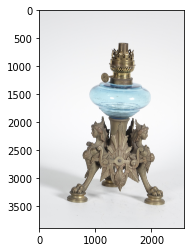

In [2]:
ex_image_blue = cv2.imread("/Users/leagleissner/Documents/GitHub/InformationRetrieval/images/HM-11-223.JPG")
ex_image_blue = cv2.cvtColor(ex_image_blue, cv2.COLOR_BGR2RGB)
plt.imshow(ex_image_blue)

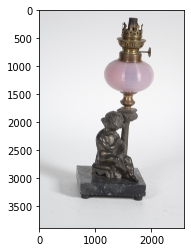

In [3]:
ex_image_rosa = cv2.imread("/Users/leagleissner/Documents/GitHub/InformationRetrieval/images/HM-11-207.JPG")
ex_image_rosa = cv2.cvtColor(ex_image_rosa, cv2.COLOR_BGR2RGB)
plt.imshow(ex_image_rosa)

**Image Preparation:** We than have to prepare the image with reshaping since we will use k-means clustering in the following. CV2 works with Numpy Array representations of images and k-means needs a 3D array to work - but our image is in 2D. That is why we have to reshape it. [1]

In [4]:
def prep_image(raw_img):
    return raw_img.reshape(raw_img.shape[0]*raw_img.shape[1], 3)

In [5]:
prep_image(ex_image_blue)

array([[225, 226, 228],
       [225, 226, 228],
       [225, 226, 228],
       ...,
       [234, 235, 237],
       [233, 234, 236],
       [233, 234, 236]], dtype=uint8)

In [6]:
prep_image(ex_image_rosa)

array([[217, 218, 220],
       [217, 218, 220],
       [217, 218, 220],
       ...,
       [225, 226, 228],
       [225, 226, 228],
       [227, 227, 229]], dtype=uint8)

In [13]:
modified_image_blue = prep_image(ex_image_blue)

In [8]:
modified_image_rosa = prep_image(ex_image_rosa)

**Color analysis** We than perform the color analysis. Since we will later map the colors values to their closet colour name in CSS3 style we use RGB values for that.
[1] provides us with a plot of the color analysis, which we will use for demonstration purposes but what will be not necessary for the future large-scale analysis.

In [9]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [10]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#8d816e', '#e5e7e9', '#bfcacc', '#f5f5f6', '#534a3f']


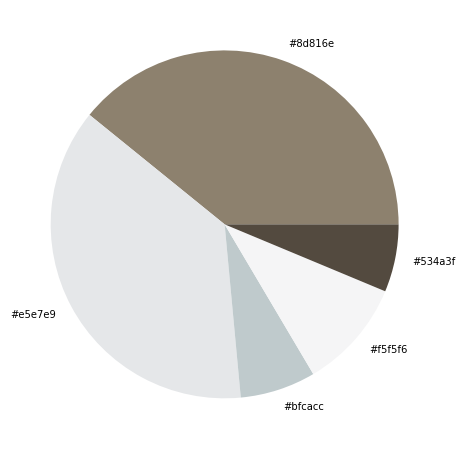

In [14]:
color_analysis(modified_image_blue)

['#b7a8ae', '#736a62', '#dedee0', '#efeff1', '#3f3a37']


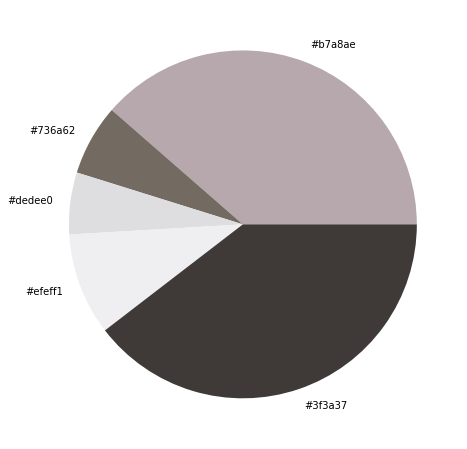

In [15]:
color_analysis(modified_image_rosa)

### Map Hex-values to words
This is an approach by Mir AbdulHaseeb at https://medium.com/codex/rgb-to-color-names-in-python-the-robust-way-ec4a9d97a01f

In [18]:
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb)

def convert_hex_to_names(rgb_tuple):
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))

    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'closest match: {names[index]}'

In [19]:
from PIL import ImageColor
values = ['#b7a8ae', '#736a62', '#dedee0', '#efeff1', '#3f3a37']
names = [convert_hex_to_names(ImageColor.getcolor(value, "RGB")) for value in values]

In [20]:
names

['closest match: darkgray',
 'closest match: dimgray',
 'closest match: gainsboro',
 'closest match: whitesmoke',
 'closest match: darkslategray']

In [21]:
values = ['#8d816e', '#e5e7e9', '#bfcacc', '#f5f5f6', '#534a3f']
names = [convert_hex_to_names(ImageColor.getcolor(value, "RGB")) for value in values]

In [22]:
names

['closest match: gray',
 'closest match: lavender',
 'closest match: silver',
 'closest match: whitesmoke',
 'closest match: darkolivegreen']

### Large scale image analysis